**PLOT PRICE DATASET(USING LINEAR REGRESSION )**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving plot price dataset.xlsx to plot price dataset.xlsx


In [2]:
import pandas as pd
df=pd.read_excel(uploaded['plot price dataset.xlsx'])
df

,plot size,plot Price
0,88.194916,6.745698
1,11.421578,26.825975
2,3.155872,11.124912
3,74.200261,79.203688
4,80.229253,84.265349
5,33.757495,33.923655
6,17.946027,34.347199
7,42.706904,62.547119
8,56.437725,72.280703
9,46.064391,64.209308


In [3]:
import pandas as pd
df=pd.read_excel(uploaded['plot price dataset.xlsx'])
x=df['plot size']
y=df['plot Price']

In [4]:
class MylR:
  def fit(self,x,y,epoch,learningrate):
    m=0
    c=0
    length=len(x)
    for j in range(epoch):
      for i in range(length):
        model_output=m*x[i]+c
        error=model_output-y[i]
        gm=-2*error*x[i]/length
        gc=-2*error/length
        m=m+(learningrate*gm)
        c=c+(learningrate*gc)
    return m,c
  def predict(self,m,c,x):
     output=[]
     for i in range(len(x)):
       o=m*x[i]+c
       output.append(o)
     return output

In [5]:
model=MylR()
m,c=model.fit(x,y,100,0.001)#training

In [6]:
O=model.predict(m,c,x)

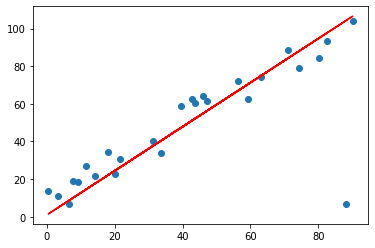

In [7]:
import matplotlib.pyplot as plt  #plot sample shows in dot-----
plt.scatter(x,y)
plt.plot(x,O,c='red')

In [8]:
import numpy as np
xarr=np.array(x)
yarr=np.array(y)
xnew=xarr.reshape(-1,1)
ynew=yarr.reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xnew,ynew)

LinearRegression()

In [9]:
prediction=lr.predict(xnew)

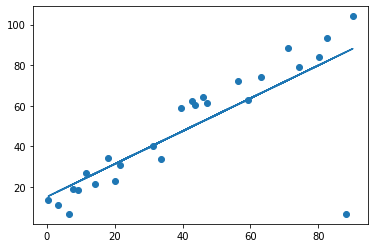

In [10]:
plt.scatter(x,y)
plt.plot(x,prediction)

In [11]:
from sklearn.metrics import r2_score #r2_score used in regression for 
r2_score(ynew,prediction)

0.6184368081999585

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,ynew,test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [14]:
model_output=lr.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest,model_output)

-12.481829518610624

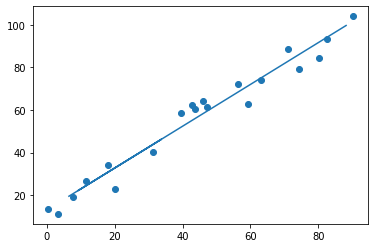

In [15]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain)
plt.plot(xtest,model_output)

In [16]:
import pickle
pickle.dump(lr,open('weights','wb'))

In [17]:
abc=pickle.load(open('weights','rb'))

In [18]:
abc.predict([[120]])

array([[131.01781361]])